In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Configure Model

In [2]:
import insightface
from insightface.app import FaceAnalysis
# buffalo_l model
app = FaceAnalysis(name='buffalo_l', root='models', providers=['CUDAExecutionProvider'])

app.prepare(ctx_id=0, det_size=(640, 640)) # resize img

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: models/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: models/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: models/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: models/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: models/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


## Load Image

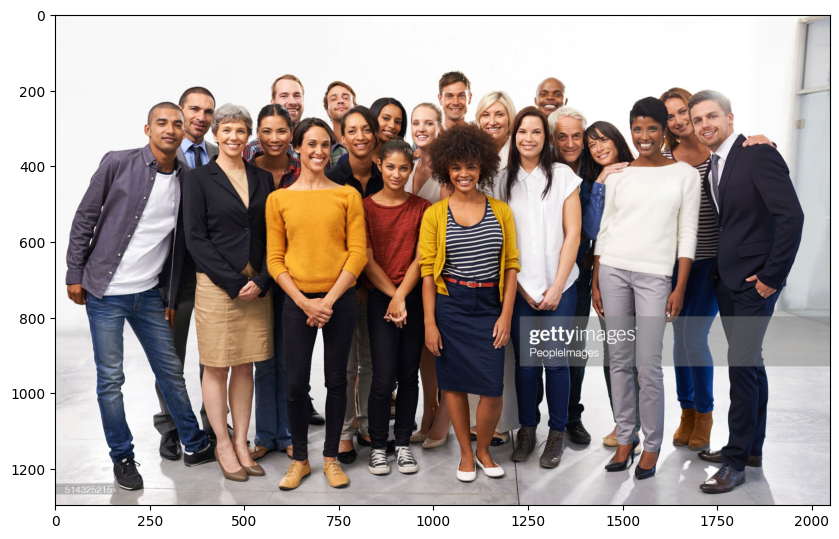

In [7]:
img = cv2.imread('test_image_2.jpg')
# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Apply Face Detection

In [4]:
result = app.get(img)

/mnt/d/aloka-vision/aloka-vision-venv/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


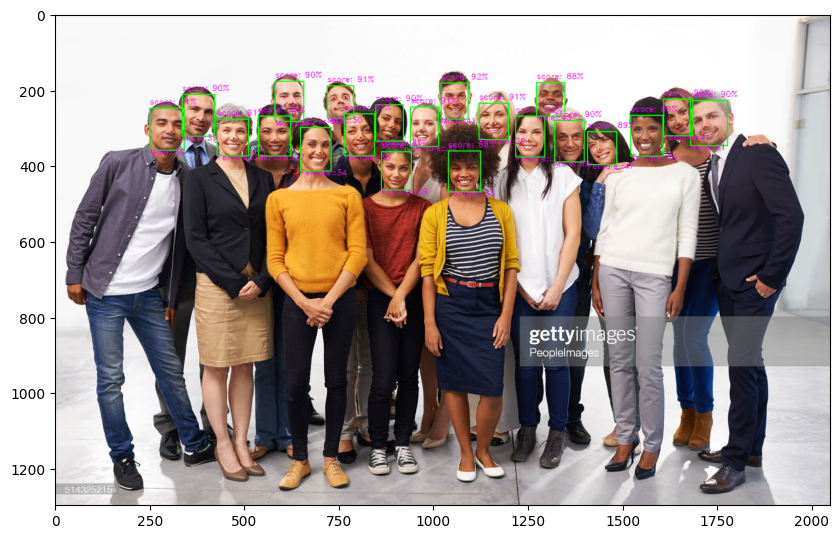

In [8]:
# draw bounding box of each face
img_copy = img.copy()
gender_encode = ['Female', 'Male']
for idx, face in enumerate(result):
    bbox = face['bbox']
    # draw rectangle
    cv2.rectangle(img_copy, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 255, 0), 2)

    # key points
    kps = face['kps'].astype(np.int32)
    # draw key points
    for k1, k2 in kps:
        cv2.circle(img_copy, (k1, k2), 1, (0, 0, 255), 2)

    # detection score
    score = "score: {}%".format(int(face['det_score'] * 100))
    # draw score
    cv2.putText(img_copy, score, (int(bbox[0]), int(bbox[1])-10), cv2.FONT_HERSHEY_DUPLEX, 0.7, (255, 0, 255))

    # age and gender
    gender = gender_encode[face['gender']]
    age = face['age']
    age_gender = f"{gender}::{age}"

    cv2.putText(img_copy, age_gender, (int(bbox[0]), int(bbox[3])+11), cv2.FONT_HERSHEY_DUPLEX, 0.7, (255, 0, 255))

            

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.show()
